# **indian liver patient Prediction**

**Context**

Patients with Liver disease have been continuously increasing because of excessive consumption of alcohol, inhale of harmful gases, intake of contaminated food, pickles and drugs. This dataset was used to evaluate prediction algorithms in an effort to reduce burden on doctors.

**Import necessary libraries**

In [1]:
# Import necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style for better visuals
sns.set()

# Scikit-learn imports
from sklearn.model_selection import GridSearchCV, ShuffleSplit, train_test_split,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Metrics for model evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_curve,auc,roc_auc_score

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Display file paths in the dataset directory
dataset_path = '/kaggle/input'  # Update this if the dataset is located elsewhere
for dirname, _, filenames in os.walk(dataset_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))


sns.set_palette("muted")                  # Set a muted color palette for consistency


/kaggle/input/indian-liver-patient-records/indian_liver_patient.csv


# **About Dataset**

**Content**

This data set contains 416 liver patient records and 167 non liver patient records collected from North East of Andhra Pradesh, India. The "Dataset" column is a class label used to divide groups into liver patient (liver disease) or not (no disease). This data set contains 441 male patient records and 142 female patient records.

**Columns:**

* Age of the patient
 
* Gender of the patient

* Total Bilirubin
 
* Direct Bilirubin
 
* Alkaline Phosphotase
 
* Alamine Aminotransferase
 
* Aspartate Aminotransferase
 
* Total Protiens

* Albumin

* Albumin and Globulin Ratio
 
* **Class:** field used to split the data into two sets (patient with liver disease -->> 1, or no disease -->2) --> convert to (patient with liver disease -->> 1, or no disease -->0)

**Load Dataset**

In [2]:
df = pd.read_csv("/kaggle/input/indian-liver-patient-records/indian_liver_patient.csv")
df.shape

(583, 11)

**Show top5 rows**

In [3]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


**Rename Tarrget Column name**

In [4]:
df.rename(columns={"Dataset":"Class"},inplace=True)

**Class Value Replacement**

In [5]:
print(df['Class'].value_counts())
df["Class"].replace(2,0 , inplace=True)
print("\nReplace Succesfully -- 2 -->> 0\n")
print(df['Class'].value_counts())

Class
1    416
2    167
Name: count, dtype: int64

Replace Succesfully -- 2 -->> 0

Class
1    416
0    167
Name: count, dtype: int64


**Dataset Information and Statistical Summery**

In [6]:
print(df.info())
print("\nStatistical Analysis --\n")
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Class                       583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB
None

Statistical Analysis --



,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Class
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,0.713551
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,1.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,1.000000


**Handling Missing Values: Analysis and Removal**

In [7]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Class                         0
dtype: int64

In [8]:
print("Missing Values -- >> " ,df.isnull().sum().sum())
df["Albumin_and_Globulin_Ratio"] = df.Albumin_and_Globulin_Ratio.fillna(df['Albumin_and_Globulin_Ratio'].mean())
print("\Fill Missing Values Succesfully with mean\n")
print("After Fill Missing Values -- >> " ,df.isnull().sum().sum())

Missing Values -- >>  4
\Fill Missing Values Succesfully with mean

After Fill Missing Values -- >>  0


**Managing Duplicate Records: Identification and Removal**

In [9]:
print("Before Drop Size -- >> ",df.shape)
print("duplicated Values -- >> " ,df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("\nDrop Duplicated Values Succesfully \n")
print("After Drop duplicated Values -- >> " ,df.duplicated().sum())
print("After Drop Size -- >> ",df.shape)

Before Drop Size -- >>  (583, 11)
duplicated Values -- >>  13

Drop Duplicated Values Succesfully 

After Drop duplicated Values -- >>  0
After Drop Size -- >>  (570, 11)


# **Class Distribution**

* Imbalanced Class

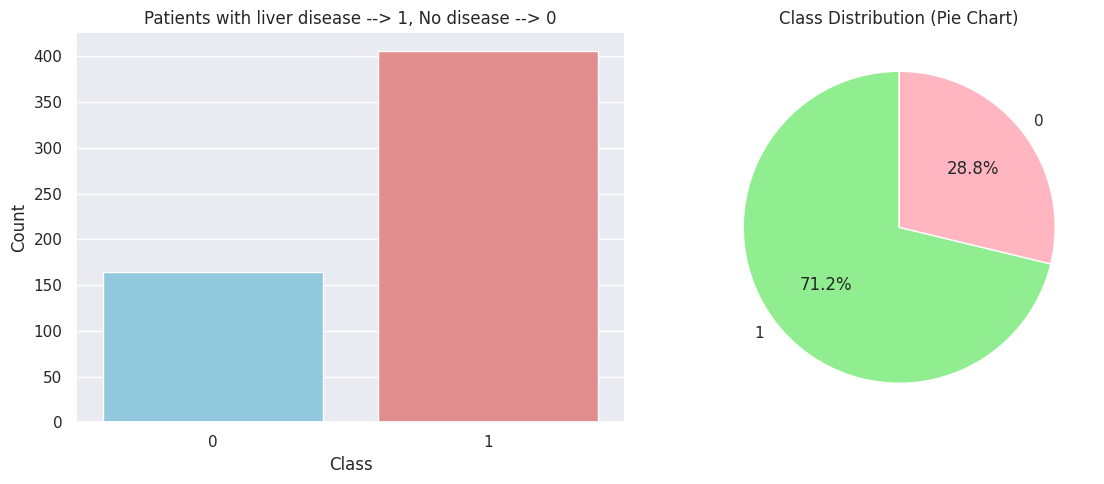

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
count_plot_colors = ['skyblue', 'lightcoral']
pie_chart_colors = ['lightgreen', 'lightpink']

# First subplot: count plot
sns.countplot(x=df["Class"], ax=ax[0], saturation=0.75,palette=count_plot_colors)
ax[0].set_title("Patients with liver disease --> 1, No disease --> 0")
ax[0].set_xlabel("Class")
ax[0].set_ylabel("Count")


# Second subplot: pie chart
ax[1].pie(df["Class"].value_counts(), labels=df["Class"].value_counts().index,
          autopct='%1.1f%%', startangle=90,colors=pie_chart_colors)
ax[1].set_title("Class Distribution (Pie Chart)")

plt.tight_layout()
plt.show()


**Gender Distribution Analysis**

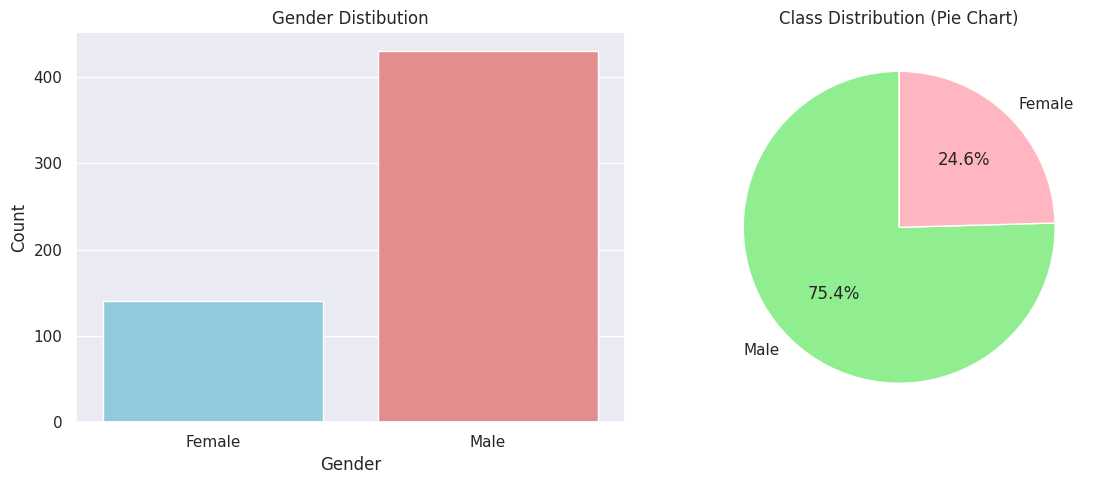

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
count_plot_colors = ['skyblue', 'lightcoral']
pie_chart_colors = ['lightgreen', 'lightpink']

# First subplot: count plot
sns.countplot(x=df["Gender"], ax=ax[0], saturation=0.75,palette=count_plot_colors)
ax[0].set_title("Gender Distibution")
ax[0].set_xlabel("Gender")
ax[0].set_ylabel("Count")


# Second subplot: pie chart
ax[1].pie(df["Gender"].value_counts(), labels=df["Gender"].value_counts().index,
          autopct='%1.1f%%', startangle=90,colors=pie_chart_colors)
ax[1].set_title("Class Distribution (Pie Chart)")

plt.tight_layout()
plt.show()


**Gender Distribution by Class**

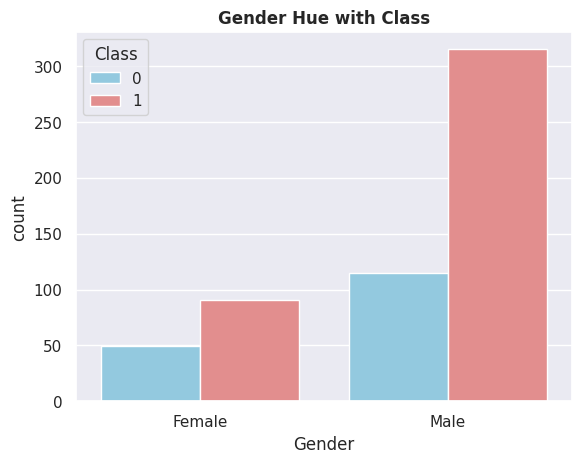

In [12]:
sns.countplot(x=df["Gender"], hue=df["Class"], saturation=0.75,palette=count_plot_colors)
plt.title("Gender Hue with Class",fontweight='bold')
plt.show()

In [13]:
num_features = df.select_dtypes(include="number")


**Distribution of Numerical Features**


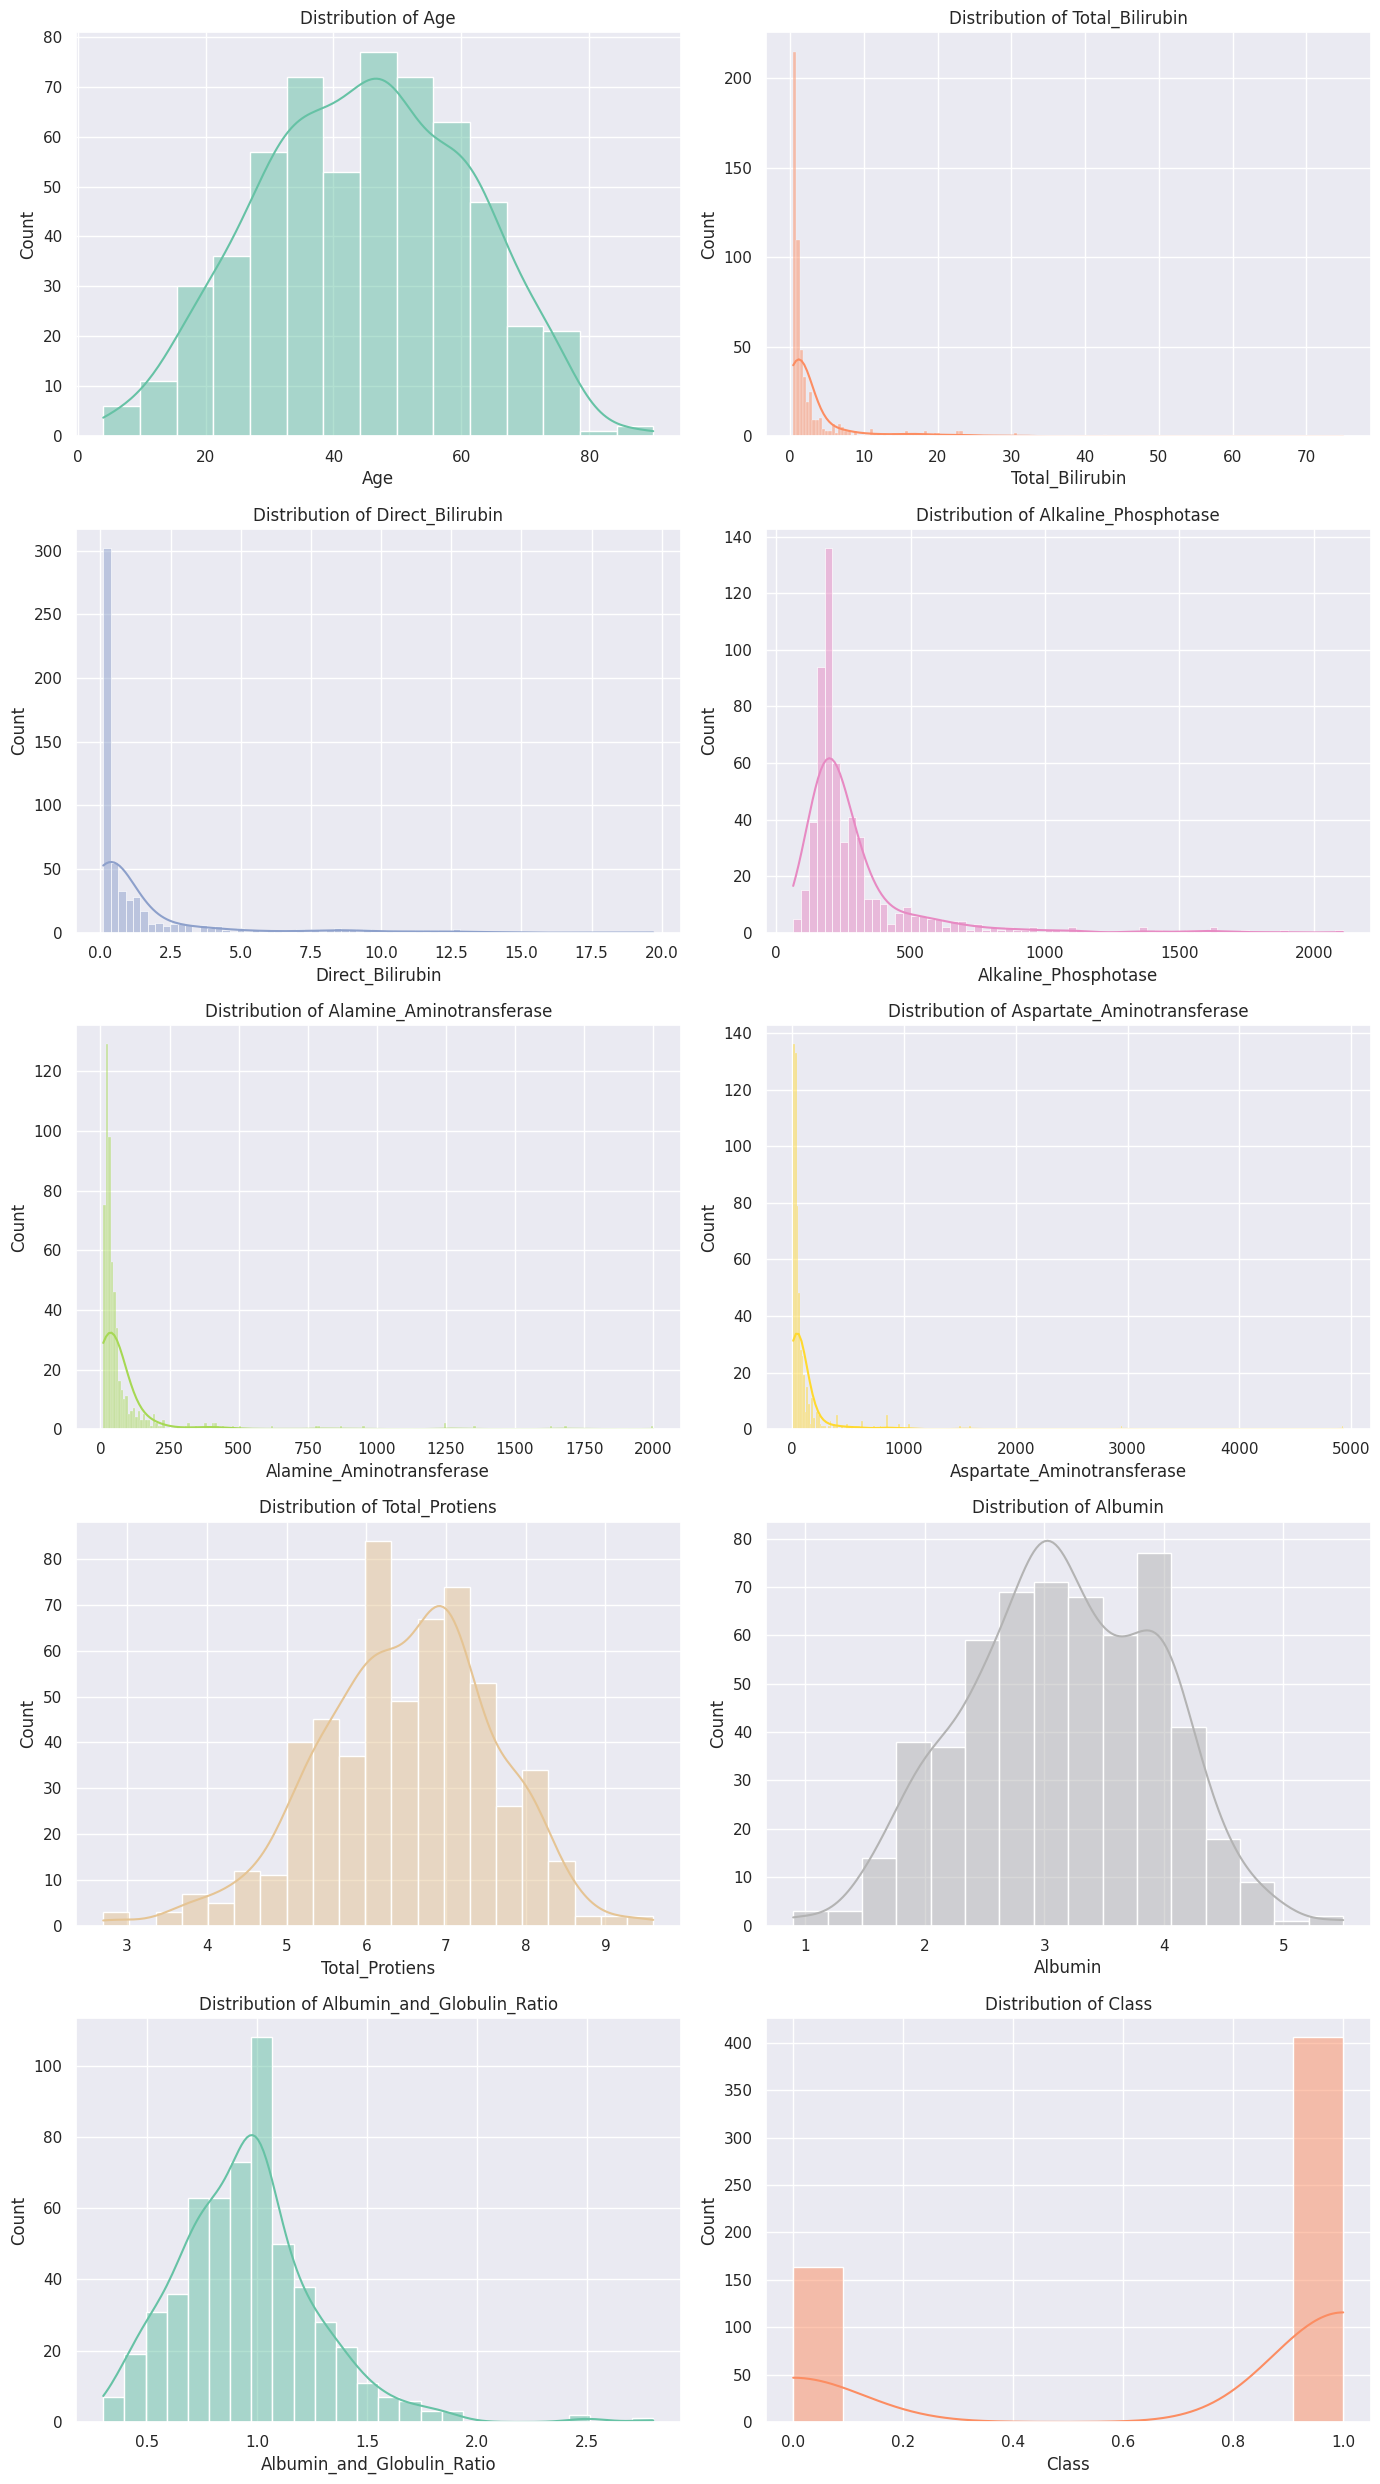

In [14]:
# Assuming 'num_features' is a DataFrame with numerical features
fig, ax = plt.subplots(5, 2, figsize=(14, 25))
ax = ax.flatten()

# Choose a Seaborn color palette
colors = sns.color_palette("Set2", n_colors=len(num_features))

# Loop through numerical features and plot histograms with a refined color palette
for i, feature in enumerate(num_features.columns):
    sns.histplot(df[feature],kde=True, ax=ax[i], color=colors[i])
    ax[i].set_title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()



**Distribution of Numerical Features by Class**


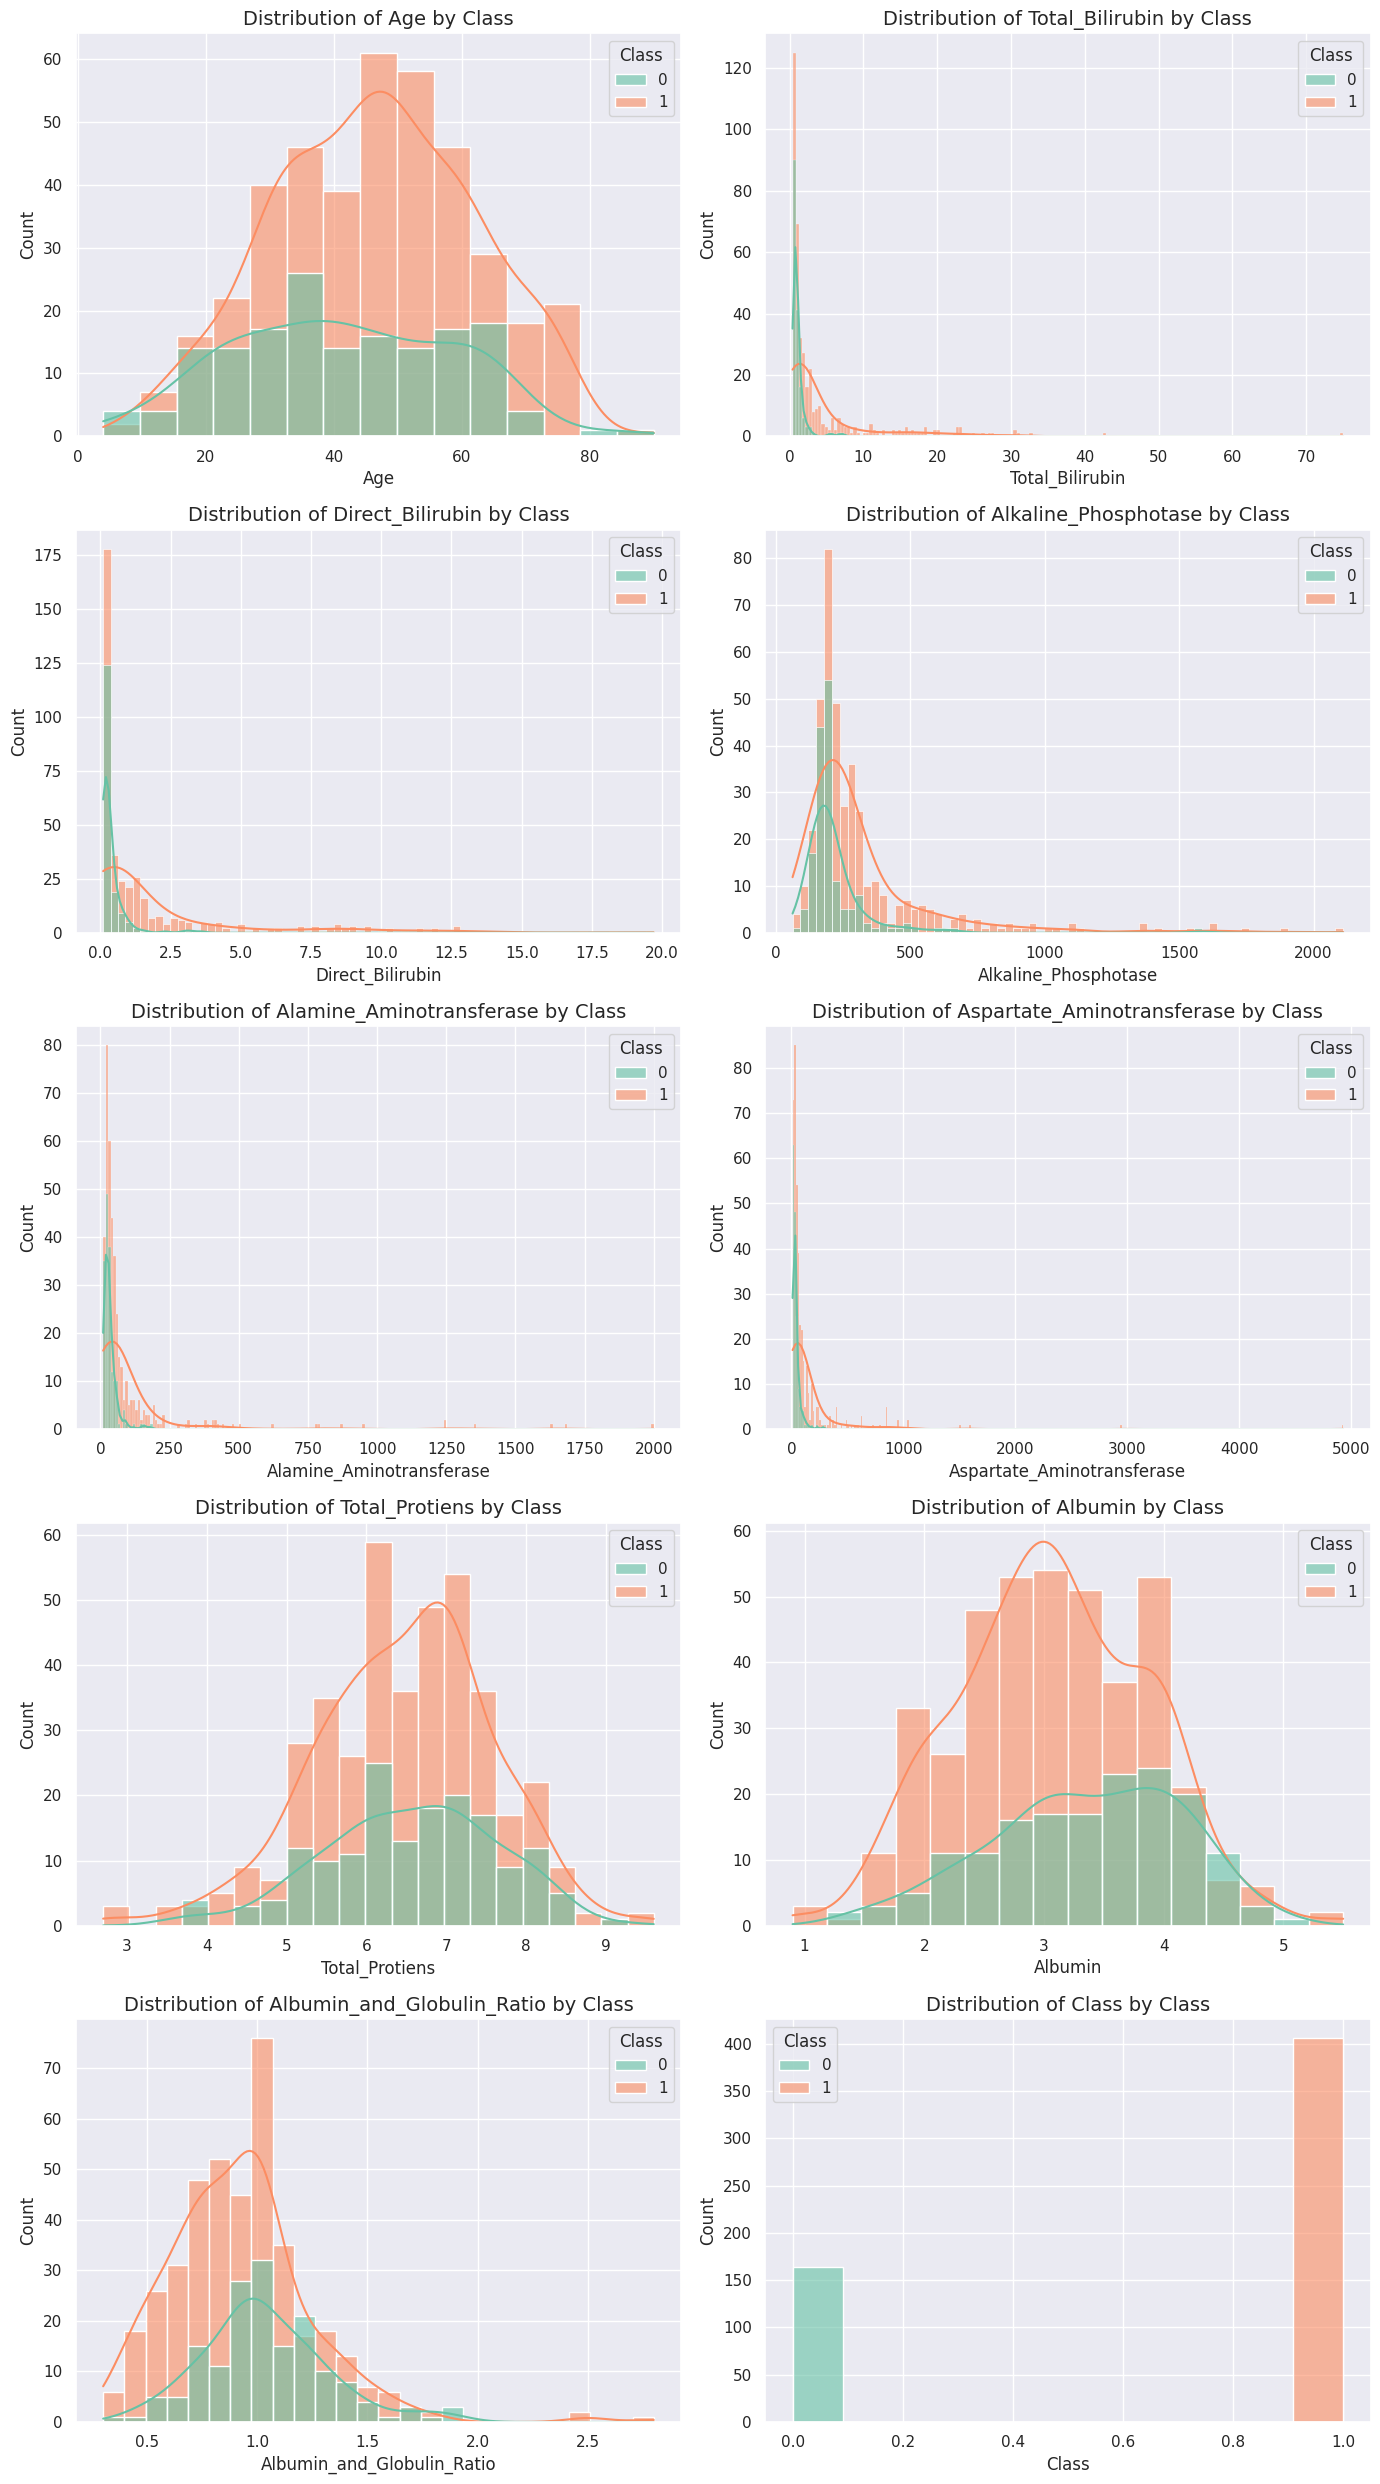

In [15]:
# Assuming 'num_features' is a DataFrame with numerical features
fig, ax = plt.subplots(5, 2, figsize=(14, 25))  # Adjusted figsize for better spacing
ax = ax.flatten()  # Flatten the axes array for easier indexing

# Loop through numerical features and plot histograms with KDE and hue for class
for i, feature in enumerate(num_features.columns):
    sns.histplot(data=df, x=feature, kde=True, hue="Class", ax=ax[i], palette="Set2", alpha=0.6)
    ax[i].set_title(f'Distribution of {feature} by Class', fontsize=14)
    ax[i].set_xlabel(feature, fontsize=12)
    ax[i].set_ylabel('Count', fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()


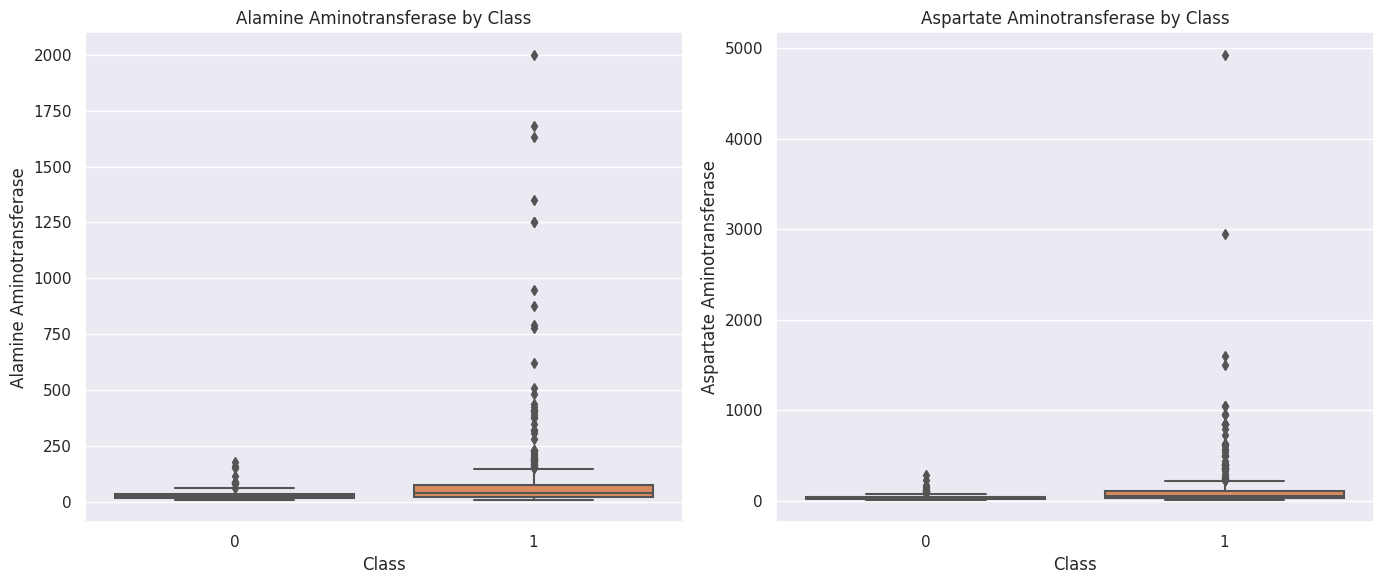

In [16]:
# Set the figure size for better visualization
plt.figure(figsize=(14, 6))

# First subplot: Boxplot for Alamine_Aminotransferase
plt.subplot(1, 2, 1)
sns.boxplot(x=df["Class"], y=df["Alamine_Aminotransferase"])
plt.title('Alamine Aminotransferase by Class')
plt.xlabel('Class')
plt.ylabel('Alamine Aminotransferase')

# Second subplot: Boxplot for Aspartate_Aminotransferase
plt.subplot(1, 2, 2)
sns.boxplot(x=df["Class"], y=df["Aspartate_Aminotransferase"])
plt.title('Aspartate Aminotransferase by Class')
plt.xlabel('Class')
plt.ylabel('Aspartate Aminotransferase')

# Adjust layout for better spacing between plots
plt.tight_layout()

# Show the plot
plt.show()


**Outlier Removal Using the Interquartile Range (IQR) Method for Grouped Data**

In [17]:
def remove_outliers(data, column, group_by):
    # Create a copy to avoid modifying the original dataset
    cleaned_data = data.copy()

    # Iterate through each group based on the 'group_by' column
    for group, subset in cleaned_data.groupby(group_by):
        # Calculate Q1, Q3, and IQR for the current group
        q1 = np.percentile(subset[column].dropna(), 25)
        q3 = np.percentile(subset[column].dropna(), 75)
        IQR = q3 - q1

        # Calculate the lower and upper bounds
        lower = q1 - 1.5 * IQR
        upper = q3 + 1.5 * IQR

        # Filter outliers within the group
        is_in_bounds = (cleaned_data[column] >= lower) & (cleaned_data[column] <= upper) & (cleaned_data[group_by] == group)
        cleaned_data = cleaned_data[is_in_bounds | (cleaned_data[group_by] != group)]

    return cleaned_data

# Apply the function to remove outliers
print("Before removing outliers:", df.shape)
df2 = remove_outliers(df, column="Albumin_and_Globulin_Ratio", group_by="Class")
df2 = remove_outliers(df2, column="Aspartate_Aminotransferase", group_by="Class")
print("After removing outliers:", df2.shape)


Before removing outliers: (570, 11)
After removing outliers: (490, 11)


**Boxplots for Alamine and Aspartate Aminotransferase After Removing Outliers**

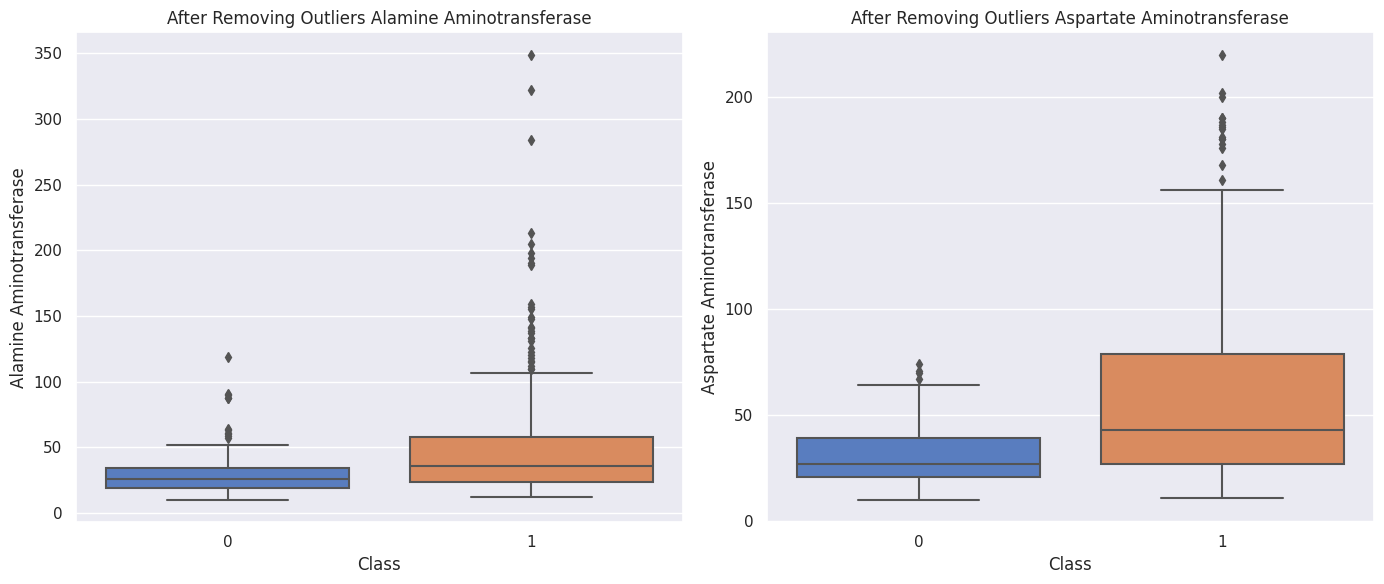

In [18]:
# Set the figure size for better visualization
plt.figure(figsize=(14, 6))

# First subplot: Boxplot for Alamine_Aminotransferase
plt.subplot(1, 2, 1)
sns.boxplot(x=df2["Class"], y=df2["Alamine_Aminotransferase"])
plt.title('After Removing Outliers Alamine Aminotransferase')
plt.xlabel('Class')
plt.ylabel('Alamine Aminotransferase')

# Second subplot: Boxplot for Aspartate_Aminotransferase
plt.subplot(1, 2, 2)
sns.boxplot(x=df2["Class"], y=df2["Aspartate_Aminotransferase"])
plt.title('After Removing Outliers Aspartate Aminotransferase')
plt.xlabel('Class')
plt.ylabel('Aspartate Aminotransferase')

# Adjust layout for better spacing between plots
plt.tight_layout()

# Show the plot
plt.show()


**Correlation Matrix of Numerical Features**

In [19]:
num_features = df2.select_dtypes(include="number")
num_features.columns

matrix = num_features.corr()
matrix

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Class
Age,1.000000,0.043945,0.040186,0.104993,-0.055973,0.026010,-0.221585,-0.277908,-0.222987,0.150573
Total_Bilirubin,0.043945,1.000000,0.820647,0.162891,0.173238,0.316514,-0.058648,-0.219722,-0.282814,0.186669
Direct_Bilirubin,0.040186,0.820647,1.000000,0.195729,0.221637,0.378451,-0.059583,-0.237686,-0.306189,0.217281
Alkaline_Phosphotase,0.104993,0.162891,0.195729,1.000000,0.244409,0.298593,-0.055605,-0.172908,-0.248006,0.185938
Alamine_Aminotransferase,-0.055973,0.173238,0.221637,0.244409,1.000000,0.604357,0.023904,0.000232,-0.045940,0.233407
Aspartate_Aminotransferase,0.026010,0.316514,0.378451,0.298593,0.604357,1.000000,-0.047456,-0.177237,-0.225480,0.321140
Total_Protiens,-0.221585,-0.058648,-0.059583,-0.055605,0.023904,-0.047456,1.000000,0.824933,0.294414,-0.064854
Albumin,-0.277908,-0.219722,-0.237686,-0.172908,0.000232,-0.177237,0.824933,1.000000,0.758228,-0.166034
Albumin_and_Globulin_Ratio,-0.222987,-0.282814,-0.306189,-0.248006,-0.045940,-0.225480,0.294414,0.758228,1.000000,-0.176164
Class,0.150573,0.186669,0.217281,0.185938,0.233407,0.321140,-0.064854,-0.166034,-0.176164,1.000000


**Correlation Heatmap of the Numerical Features Matrix**

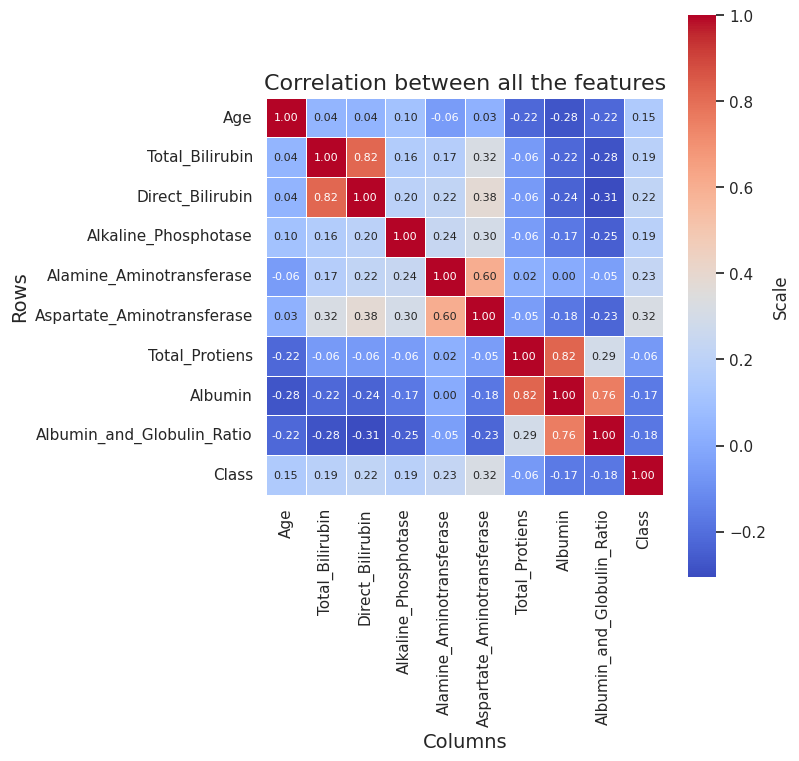

In [20]:
plt.figure(figsize=(8,8))

# Plotting Heatmaps for Correlations between all the features
sns.heatmap(
            matrix, cbar = True,square = True, annot=True,annot_kws={'size': 8}, cmap='coolwarm', fmt='.2f', linewidths=0.5,
            cbar_kws={'label': 'Scale'}
           )

# Add title and axis labels
plt.title('Correlation between all the features', fontsize=16)
plt.xlabel('Columns', fontsize=14)
plt.ylabel('Rows', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()



**The correlation matrix gives us the relationship between two features. As seen above, the following pairs of features seem to be very closely related as indicated by their high correlation coefficients:**

1. Total Bilirubin and Direct Bilirubin(0.82)

2. Sgpt Alamine Aminotransferase and Sgot Aspartate Aminotransferase(0.60)


3. Albumin and Total Proteins(0.82)


4. Albumin and Albumin-Globulin Ratio(0.76)

**Correlation of Numerical Features with Class**

In [21]:
num_features.corr()["Class"].sort_values(ascending=False)

Class                         1.000000
Aspartate_Aminotransferase    0.321140
Alamine_Aminotransferase      0.233407
Direct_Bilirubin              0.217281
Total_Bilirubin               0.186669
Alkaline_Phosphotase          0.185938
Age                           0.150573
Total_Protiens               -0.064854
Albumin                      -0.166034
Albumin_and_Globulin_Ratio   -0.176164
Name: Class, dtype: float64

**Scatter Plot of Alamine vs Aspartate Aminotransferase by Class**

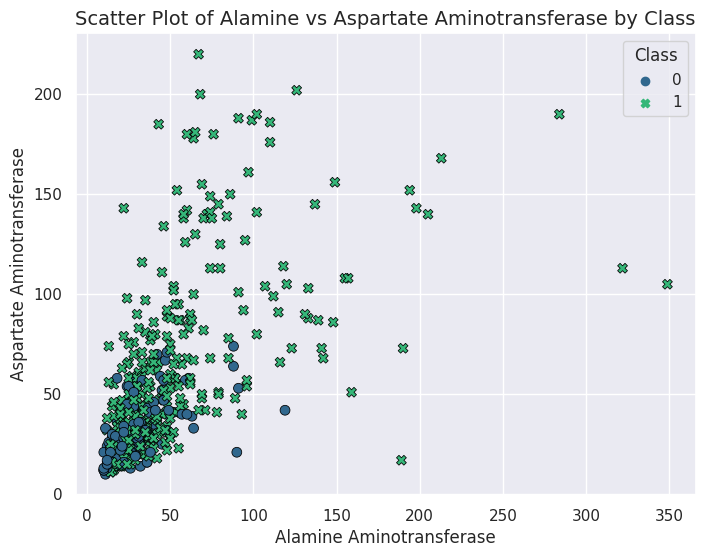

In [22]:
palette = sns.color_palette("viridis", as_cmap=False)

# Create the scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df2["Alamine_Aminotransferase"], y=df2["Aspartate_Aminotransferase"], 
                hue=df2["Class"], palette="viridis", style=df2["Class"], s=50, edgecolor='black')

# Add title and labels
plt.title('Scatter Plot of Alamine vs Aspartate Aminotransferase by Class', fontsize=14)
plt.xlabel('Alamine Aminotransferase', fontsize=12)
plt.ylabel('Aspartate Aminotransferase', fontsize=12)

# Improve legend placement
plt.legend(title='Class', loc='upper right')

# Show the plot
plt.show()


**Scatter Plot of Total_Protiens vs Albumin by Class**

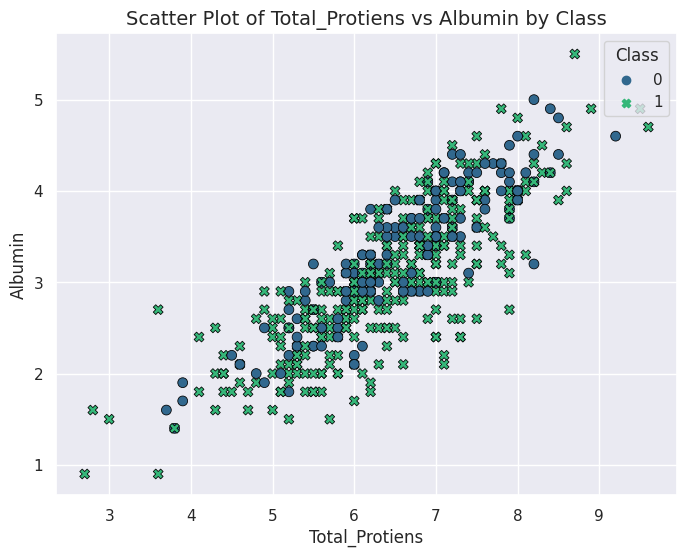

In [23]:
palette = sns.color_palette("viridis", as_cmap=False)

# Create the scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df2["Total_Protiens"], y=df2["Albumin"], 
                hue=df2["Class"], palette="viridis", style=df2["Class"], s=50, edgecolor='black')



# Add title and labels
plt.title('Scatter Plot of Total_Protiens vs Albumin by Class', fontsize=14)
plt.xlabel('Total_Protiens', fontsize=12)
plt.ylabel('Albumin', fontsize=12)

# Improve legend placement
plt.legend(title='Class', loc='upper right')

# Show the plot
plt.show()


**Scatter Plot of Direct_Bilirubin vs Total_Bilirubin by Class**

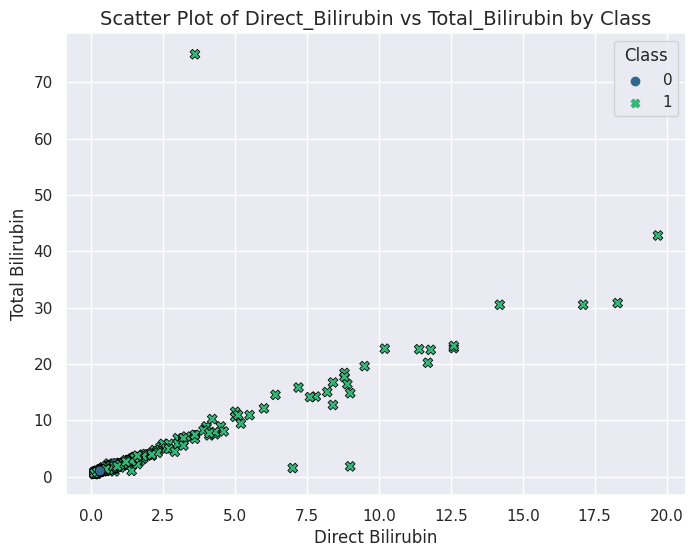

In [24]:
palette = sns.color_palette("viridis", as_cmap=False)

# Create the scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df2["Direct_Bilirubin"], y=df2["Total_Bilirubin"], 
                hue=df2["Class"], palette="viridis", style=df2["Class"], s=50, edgecolor='black')


# Add title and labels
plt.title('Scatter Plot of Direct_Bilirubin vs Total_Bilirubin by Class', fontsize=14)
plt.xlabel('Direct Bilirubin', fontsize=12)
plt.ylabel('Total Bilirubin', fontsize=12)

# Improve legend placement
plt.legend(title='Class', loc='upper right')

# Show the plot
plt.show()


# **Feature Engineering**


**Splitting Features and Target Variable**


In [25]:
X=df2.drop("Class",axis=1)
y=df2["Class"]
X.shape ,y.shape

((490, 10), (490,))

**Split Data**

In [26]:
# # Filter rows where Class is 0 and Class is 1
# df_class0 = df2[df2["Class"] == 0]
# df_class1 = df2[df2["Class"] == 1]

# # Select 30 rows from class 0 and 30 rows from class 1
# test_class0 = df_class0.sample(n=30, random_state=42)  # 30 samples from class 0
# test_class1 = df_class1.sample(n=30, random_state=42)  # 30 samples from class 1

# # Combine the test samples from both classes
# test_data = pd.concat([test_class0, test_class1])

# # Create the training data by dropping the indices of test_data from df2
# train_data = df2.drop(index=test_data.index)

# # Shuffle the train_data and test_data rows
# train_data = train_data.sample(frac=1, random_state=42).reset_index(drop=True)
# test_data = test_data.sample(frac=1, random_state=42).reset_index(drop=True)

# # Now split the shuffled train_data into X (features) and y (target)
# x_train = train_data.drop('Class', axis=1)
# y_train = train_data["Class"]

# # Split the shuffled test_data into X (features) and y (target)
# x_test = test_data.drop('Class', axis=1)
# y_test = test_data["Class"]

# # Print the shapes of the resulting datasets
# print(f"X_train shape: {x_train.shape}, Y_train shape: {y_train.shape}")
# print(f"X_test shape: {x_test.shape}, Y_test shape: {y_test.shape}")

In [27]:
# Assuming X is the features and y is the target column
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Print the shapes of the resulting datasets
print(f"X_train shape: {x_train.shape}, Y_train shape: {y_train.shape}")
print(f"X_test shape: {x_test.shape}, Y_test shape: {y_test.shape}")

X_train shape: (367, 10), Y_train shape: (367,)
X_test shape: (123, 10), Y_test shape: (123,)


In [28]:
# Display the distribution of the target variable in both the training and test sets
print("Class distribution in Y_train:")
print(y_train.value_counts())

print("\nClass distribution in Y_test:")
print(y_test.value_counts())


Class distribution in Y_train:
Class
1    261
0    106
Name: count, dtype: int64

Class distribution in Y_test:
Class
1    88
0    35
Name: count, dtype: int64


**One-Hot Encoding for 'Gender' Feature**

In [29]:
# Create the OneHotEncoder object with the desired parameters
ohe = OneHotEncoder(drop='first', sparse_output=False, dtype=np.int8)

x_train_encoded = ohe.fit_transform(x_train[["Gender"]])

x_test_encoded = ohe.transform(x_test[["Gender"]])

# Since OneHotEncoder returns a numpy array, you should update the column
# Replace the 'Gender' column in both the train and test data with the encoded result
x_train[["Gender"]] = x_train_encoded
x_test[["Gender"]] = x_test_encoded


**Feature Scaling Using StandardScaler**

* The model performs best on scaled data, ensuring that all features contribute equally to the model's performance.

In [30]:
# Instantiate the scaler
scale = StandardScaler()

# Scale the training and test data
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

# Convert the scaled data back to DataFrames with the original column names
x_train = pd.DataFrame(data=x_train, columns=X.columns)
x_test = pd.DataFrame(data=x_test, columns=X.columns)

# Check the shapes of the scaled data
print(f"X_train shape: {x_train.shape}")
print(f"X_test shape: {x_test.shape}")
x_train.head(2)

X_train shape: (367, 10)
X_test shape: (123, 10)


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,-0.541499,-1.680154,-0.353639,-0.421465,-0.556032,-0.600652,-0.656892,-0.522161,-0.047451,0.64586
1,0.011382,0.595184,-0.037003,0.009392,-0.511119,-0.423348,-0.728028,1.061584,1.104969,0.64586


**Handling Class Imbalance Using SMOTE (Synthetic Minority Over-sampling Technique)**

*  We do not need to perform oversampling because we already have more samples of Class 1, which is also the class of higher importance in our analysis.


In [31]:
# from imblearn.over_sampling import SMOTE

# # Instantiate the SMOTE object
# smote = SMOTE(random_state=42)

# # Apply SMOTE to generate synthetic samples for the minority class
# x_train, y_train = smote.fit_resample(x_train, y_train)

# # Check the shapes of the new datasets
# print(f"X_train shape after SMOTE: {x_train.shape}")
# print(f"Y_train shape after SMOTE: {y_train.shape}")


# **Model Training**


**Model 1 -->>  Logistic Regression**

Logistic Regression Training Score: 
 75.48
Logistic Regression Test Score: 
 66.67

Train Data 

Accuracy on train: 
 0.7547683923705722
Confusion Matrix on train: 
 [[ 39  67]
 [ 23 238]]
Classification Report on train: 
               precision    recall  f1-score   support

           0       0.63      0.37      0.46       106
           1       0.78      0.91      0.84       261

    accuracy                           0.75       367
   macro avg       0.70      0.64      0.65       367
weighted avg       0.74      0.75      0.73       367


Test Data 

Accuracy on test: 
 0.6666666666666666
Confusion Matrix on test: 
 [[ 4 31]
 [10 78]]
Classification Report on test: 
               precision    recall  f1-score   support

           0       0.29      0.11      0.16        35
           1       0.72      0.89      0.79        88

    accuracy                           0.67       123
   macro avg       0.50      0.50      0.48       123
weighted avg       0.59      0.67      0.61  

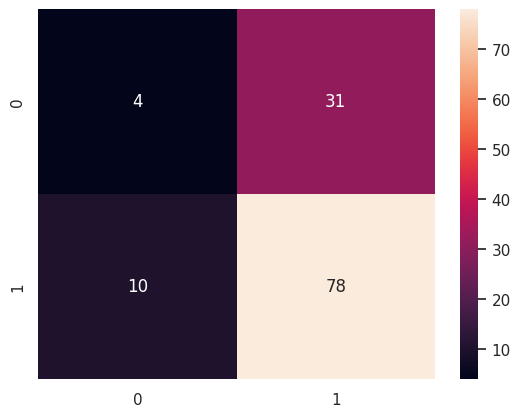

In [32]:
logreg =LogisticRegression()


# Train the model using the training sets and check score
logreg.fit(x_train, y_train)

# Predict Output
train_log_predicted= logreg.predict(x_train)
test_log_predicted= logreg.predict(x_test)

logreg_score = round(logreg.score(x_train, y_train) * 100, 2)
logreg_score_test = round(logreg.score(x_test, y_test) * 100, 2)

# Equation coefficient and Intercept
print('Logistic Regression Training Score: \n', logreg_score)
print('Logistic Regression Test Score: \n', logreg_score_test)

print("\nTrain Data \n")

print('Accuracy on train: \n', accuracy_score(y_train,train_log_predicted))
print('Confusion Matrix on train: \n', confusion_matrix(y_train,train_log_predicted))
print('Classification Report on train: \n', classification_report(y_train,train_log_predicted))

print("\nTest Data \n")

print('Accuracy on test: \n', accuracy_score(y_test,test_log_predicted))
print('Confusion Matrix on test: \n', confusion_matrix(y_test,test_log_predicted))
print('Classification Report on test: \n', classification_report(y_test,test_log_predicted))

sns.heatmap(confusion_matrix(y_test,test_log_predicted),annot=True,fmt="d")
plt.show()

# **Hyperparameter Tuning for Logistic Regression**

In [33]:
# params = {
#     "penalty": ['l1', 'l2', 'elasticnet'],           # Regularization type
#     "dual": [True, False],                           # Use dual or primal formulation
#     "tol": [0.0001, 0.001, 0.01, 0.1, 0.5, 1],      # Tolerance for stopping criteria
#     "C": [0.5, 1.0, 1.5, 2.0],                      # Regularization strength
#     "class_weight": ['dict', 'balanced'],           # Class weight options
#     "solver": ['lbfgs', 'liblinear',                # Optimization algorithms
#                'newton-cg', 'newton-cholesky', 
#                'sag', 'saga'],
#     "random_state": [0, 21, 42],                    # Random state values
#     "max_iter": [50, 100, 150, 200,                 # Iteration limits
#                  250, 300, 500, 1000],
#     "n_jobs": [-1],                                 # Use all available CPU cores
#     "l1_ratio": [0.0, 0.1, 0.3, 0.5,                # L1 to L2 ratio (elasticnet only)
#                  0.7, 0.9, 1.0]
# }


# logreg = LogisticRegression()

# # Define cross-validation strategy
# cv = ShuffleSplit(
#     n_splits=5,         # Number of splits
#     test_size=0.2,      # Fraction of test data
#     random_state=21     # Seed for reproducibility
# )

# # Initialize RandomizedSearchCV with desired parameters
# rs_lr = RandomizedSearchCV(
#     estimator=logreg,                   # Logistic regression model
#     param_distributions=params,         # Parameter distributions for hyperparameter tuning
#     n_iter=50,                          # Number of parameter combinations to try
#     cv=cv,                              # Cross-validation strategy
#     scoring='neg_mean_squared_error',   # Scoring metric
#     n_jobs=-1,                          # Use all available CPU cores
#     verbose=1,                          # Show progress during fitting
#     random_state=21                     # Seed for reproducibility
# )

# # Fit the RandomizedSearchCV
# rs_lr.fit(x_train, y_train)

# # Display the best parameters and score
# print("Best Parameters:", rs_lr.best_params_)
# print("Best Score:", rs_lr.best_score_)


# y_pred_train = rs_lr.predict(x_train)
# y_pred_test = rs_lr.predict(x_test)

# # Print accuracy and classification report for train data
# print(f"Train Accuracy Score: {accuracy_score(y_train, y_pred_train)}")
# print("\nClassification Report (Train Data):\n")
# print(classification_report(y_train, y_pred_train))

# # Evaluate model performance on test data
# print(f"Test Accuracy Score: {accuracy_score(y_test, y_pred_test)}")
# print("\nClassification Report (Test Data):\n")
# print(classification_report(y_test, y_pred_test))

# # Confusion matrix for test data
# cm = confusion_matrix(y_test, y_pred_test)
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
# plt.title("Confusion Matrix (Test Data)")
# plt.xlabel("Predicted Label")
# plt.ylabel("True Label")
# plt.show()

# **Hyperparameter Tuning for XGBClassifier**

===== Train Data Evaluation =====
Accuracy Score: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       106
           1       1.00      1.00      1.00       261

    accuracy                           1.00       367
   macro avg       1.00      1.00      1.00       367
weighted avg       1.00      1.00      1.00       367


===== Test Data Evaluation =====
Accuracy Score: 0.59

Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.37      0.41        35
           1       0.77      0.82      0.79        88

    accuracy                           0.69       123
   macro avg       0.61      0.59      0.60       123
weighted avg       0.68      0.69      0.68       123



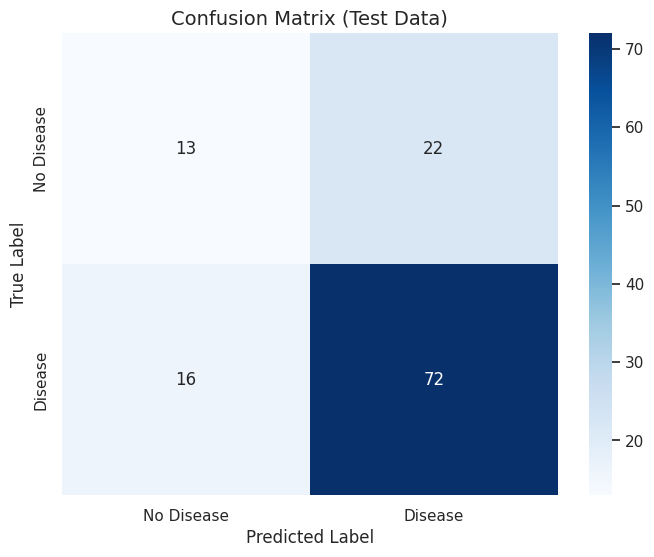

In [34]:
# without params
xgb =XGBClassifier()

# Train the model
xgb.fit(x_train, y_train)

# Predictions for train and test data
y_pred_train = xgb.predict(x_train)
y_pred_test = xgb.predict(x_test)

# Train data evaluation
print("===== Train Data Evaluation =====")
print(f"Accuracy Score: {roc_auc_score(y_train, y_pred_train):.2f}")
print("\nClassification Report:")
print(classification_report(y_train, y_pred_train))

# Test data evaluation
print("\n===== Test Data Evaluation =====")
print(f"Accuracy Score: {roc_auc_score(y_test, y_pred_test):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_test))

# Confusion Matrix for Test Data
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm, annot=True, fmt='d', cmap='Blues',
    xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease']
)
plt.title("Confusion Matrix (Test Data)", fontsize=14)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.show()


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'subsample': 0.9, 'reg_lambda': 100, 'reg_alpha': 0, 'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0.3, 'colsample_bytree': 1.0}
Best ROC-AUC Score: 0.7578672899427616
Best Parrams -->>  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0.3, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=None, num

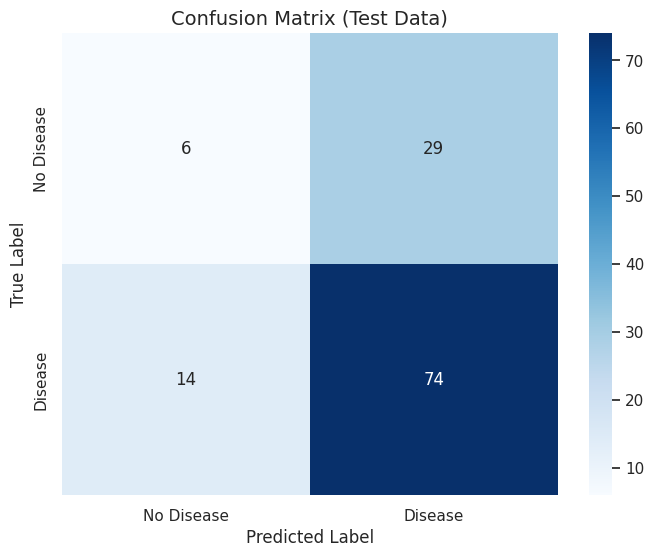

In [35]:
# Define the XGBClassifier model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=0)

# Define the parameter distribution
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'reg_alpha': [0, 0.01, 0.1, 1, 10],
    'reg_lambda': [0.01, 0.1, 1, 10, 100]
}

# Initialize RandomizedSearchCV
random_xgb = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=50,  # Number of random samples to evaluate
    scoring='roc_auc',  # Evaluation metric
    cv=5,  # 5-fold cross-validation
    verbose=1,
    n_jobs=-1,  # Use all available CPU cores
    random_state=0
)

# Perform randomized search
random_xgb.fit(x_train, y_train)

# Display the best parameters and best score
print("Best Parameters:", random_xgb.best_params_)
print("Best ROC-AUC Score:", random_xgb.best_score_)

# Train the model with the best parameters
best_xgb = random_xgb.best_estimator_

print("Best Parrams -->> ",best_xgb)

# Predictions for train and test data
y_pred_train = best_xgb.predict(x_train)
y_pred_test = best_xgb.predict(x_test)

# Train data evaluation
print("===== Train Data Evaluation =====")
print(f"ROC-AUC Score: {roc_auc_score(y_train, y_pred_train):.2f}")
print("\nClassification Report:")
print(classification_report(y_train, y_pred_train))

# Test data evaluation
print("\n===== Test Data Evaluation =====")
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_test):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_test))

# Confusion Matrix for Test Data
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm, annot=True, fmt='d', cmap='Blues',
    xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease']
)
plt.title("Confusion Matrix (Test Data)", fontsize=14)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.show()


Use Find Params from hypeparameter tunning

===== Train Data Evaluation =====
ROC-AUC Score: 0.97

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       106
           1       0.98      1.00      0.99       261

    accuracy                           0.98       367
   macro avg       0.99      0.97      0.98       367
weighted avg       0.98      0.98      0.98       367

===== Test Data Evaluation =====
ROC-AUC Score: 0.53

Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.14      0.21        35
           1       0.73      0.92      0.81        88

    accuracy                           0.70       123
   macro avg       0.57      0.53      0.51       123
weighted avg       0.64      0.70      0.64       123



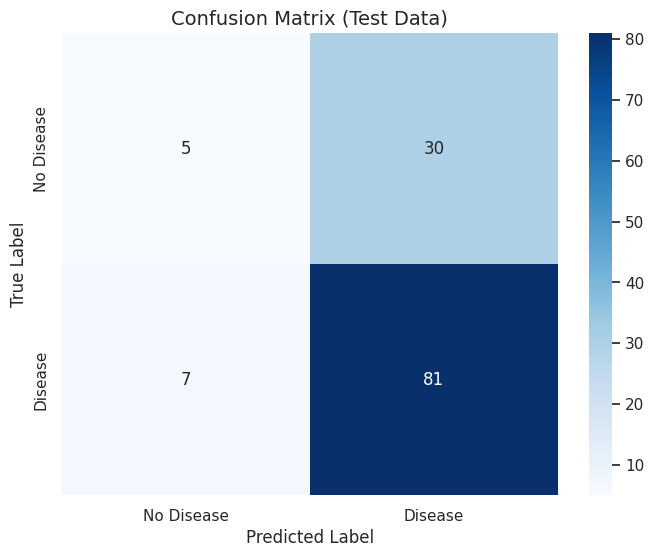

In [36]:
# Define XGBClassifier with tuned parameters
xgb_w = XGBClassifier(
    subsample=0.8,
    colsample_bytree=0.7,
    max_depth=5,
    n_estimators=200,
    learning_rate=0.05,
    gamma=0.1,
    reg_lambda=1.0,         # L2 regularization to prevent overfitting
    reg_alpha=0.1,          # L1 regularization for feature selection
    scale_pos_weight=2.5,   # Balancing importance of class 1
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Train the model
xgb_w.fit(x_train, y_train)

# Predictions for train and test data
y_pred_train = xgb_w.predict(x_train)
y_pred_test = xgb_w.predict(x_test)

# Function to evaluate and display results
def evaluate_model(y_true, y_pred, dataset_name=""):
    print(f"===== {dataset_name} Evaluation =====")
    print(f"ROC-AUC Score: {roc_auc_score(y_true, y_pred):.2f}")
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))

# Train data evaluation
evaluate_model(y_train, y_pred_train, dataset_name="Train Data")

# Test data evaluation
evaluate_model(y_test, y_pred_test, dataset_name="Test Data")

# Plot the confusion matrix for test data
def plot_confusion_matrix(y_true, y_pred, labels, title="Confusion Matrix"):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(
        cm, annot=True, fmt='d', cmap='Blues',
        xticklabels=labels, yticklabels=labels
    )
    plt.title(title, fontsize=14)
    plt.xlabel("Predicted Label", fontsize=12)
    plt.ylabel("True Label", fontsize=12)
    plt.show()

# Confusion matrix for test data
plot_confusion_matrix(
    y_test, y_pred_test,
    labels=['No Disease', 'Disease'],
    title="Confusion Matrix (Test Data)"
)


In [37]:
train_auc = roc_auc_score(y_train, xgb_w.predict_proba(x_train)[:, 1])
test_auc = roc_auc_score(y_test, xgb_w.predict_proba(x_test)[:, 1])

print("Train AUC: ", train_auc)
print("Test AUC:", test_auc)

Train AUC:  1.0
Test AUC: 0.6555194805194805


# **Random Forest**

In [38]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)
# Predict Output
rf_predicted = random_forest.predict(x_test)

random_forest_score = round(random_forest.score(x_train, y_train) * 100, 2)
random_forest_score_test = round(random_forest.score(x_test, y_test) * 100, 2)
print('Random Forest Score: \n', random_forest_score)
print('Random Forest Test Score: \n', random_forest_score_test)
print('Accuracy: \n', accuracy_score(y_test,rf_predicted))
print(confusion_matrix(y_test,rf_predicted))
print(classification_report(y_test,rf_predicted))

Random Forest Score: 
 100.0
Random Forest Test Score: 
 67.48
Accuracy: 
 0.6747967479674797
[[11 24]
 [16 72]]
              precision    recall  f1-score   support

           0       0.41      0.31      0.35        35
           1       0.75      0.82      0.78        88

    accuracy                           0.67       123
   macro avg       0.58      0.57      0.57       123
weighted avg       0.65      0.67      0.66       123



**Overall logistic Regression Perform well**

# **Further applications**

It is not expected to get the same level of performance on bigger and denser data sets. The main reasons behind this are:

1. The dataset we worked on was very small, consisting of only 583 observations where some outiers remove.

2. The dataset was highly unbalanced, the postive records being three times the number of negative ones.


Hence, even though we have obtained perfect scores on this dataset, the performance of the same models on similar but bigger datasets is expected to worsen.


